<a href="https://colab.research.google.com/github/bkrant/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [3]:
sns.__version__

'0.9.0'

In [4]:
# https://catalog.data.gov/dataset/births-birth-rates-and-fertility-rates-by-race-of-mother-united-states-1960-2013
df = pd.read_csv('https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD')
print(df.shape)
df.head()

(422, 5)


,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,White,3600744,22.7,113.2
1,1961,White,3600864,22.2,112.3
2,1962,White,3394068,21.4,107.5
3,1963,White,3326344,20.7,103.6
4,1964,White,3369160,20.0,99.8


In [0]:
df.isnull().sum()

Year               0
Race               0
Live Births        0
Birth Rate        23
Fertility Rate    23
dtype: int64

In [0]:
df.dtypes

Year               object
Race               object
Live Births         int64
Birth Rate        float64
Fertility Rate    float64
dtype: object

In [0]:
df.describe()

,Year,Live Births,Birth Rate,Fertility Rate
count,422.000000,4.220000e+02,399.000000,399.000000
mean,1993.919431,1.529754e+06,16.379198,70.831830
std,14.823047,1.547940e+06,3.714990,15.445038
min,1960.000000,2.111400e+04,9.700000,43.900000
25%,1985.000000,1.616592e+05,14.000000,62.750000
50%,1996.000000,6.330175e+05,15.700000,66.100000
75%,2006.000000,3.120435e+06,18.300000,74.150000
max,2015.000000,4.316233e+06,31.900000,153.500000


In [0]:
df.corr()

,Year,Live Births,Birth Rate,Fertility Rate
Year,1.000000,-0.071939,-0.579570,-0.627854
Live Births,-0.071939,1.000000,-0.262462,0.013155
Birth Rate,-0.579570,-0.262462,1.000000,0.909135
Fertility Rate,-0.627854,0.013155,0.909135,1.000000


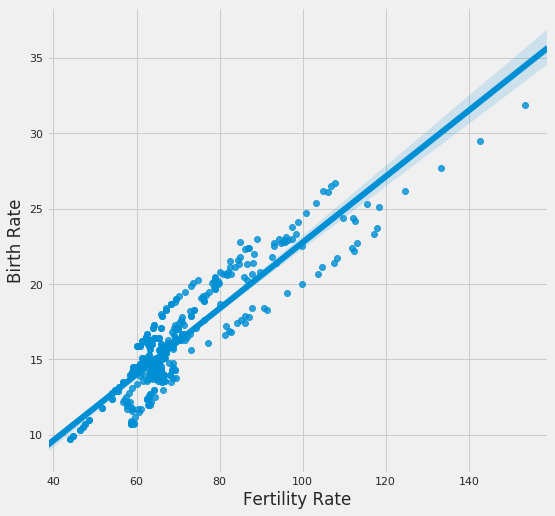

In [66]:
plt.rcParams['figure.figsize']=(8,8)
sns.regplot(df['Fertility Rate'], df['Birth Rate']);

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

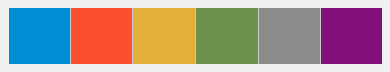

In [74]:
sns.palplot(sns.color_palette())
plt.rcParams['axes.prop_cycle'].by_key()['color']

## Birth Rate: total number of live births per population

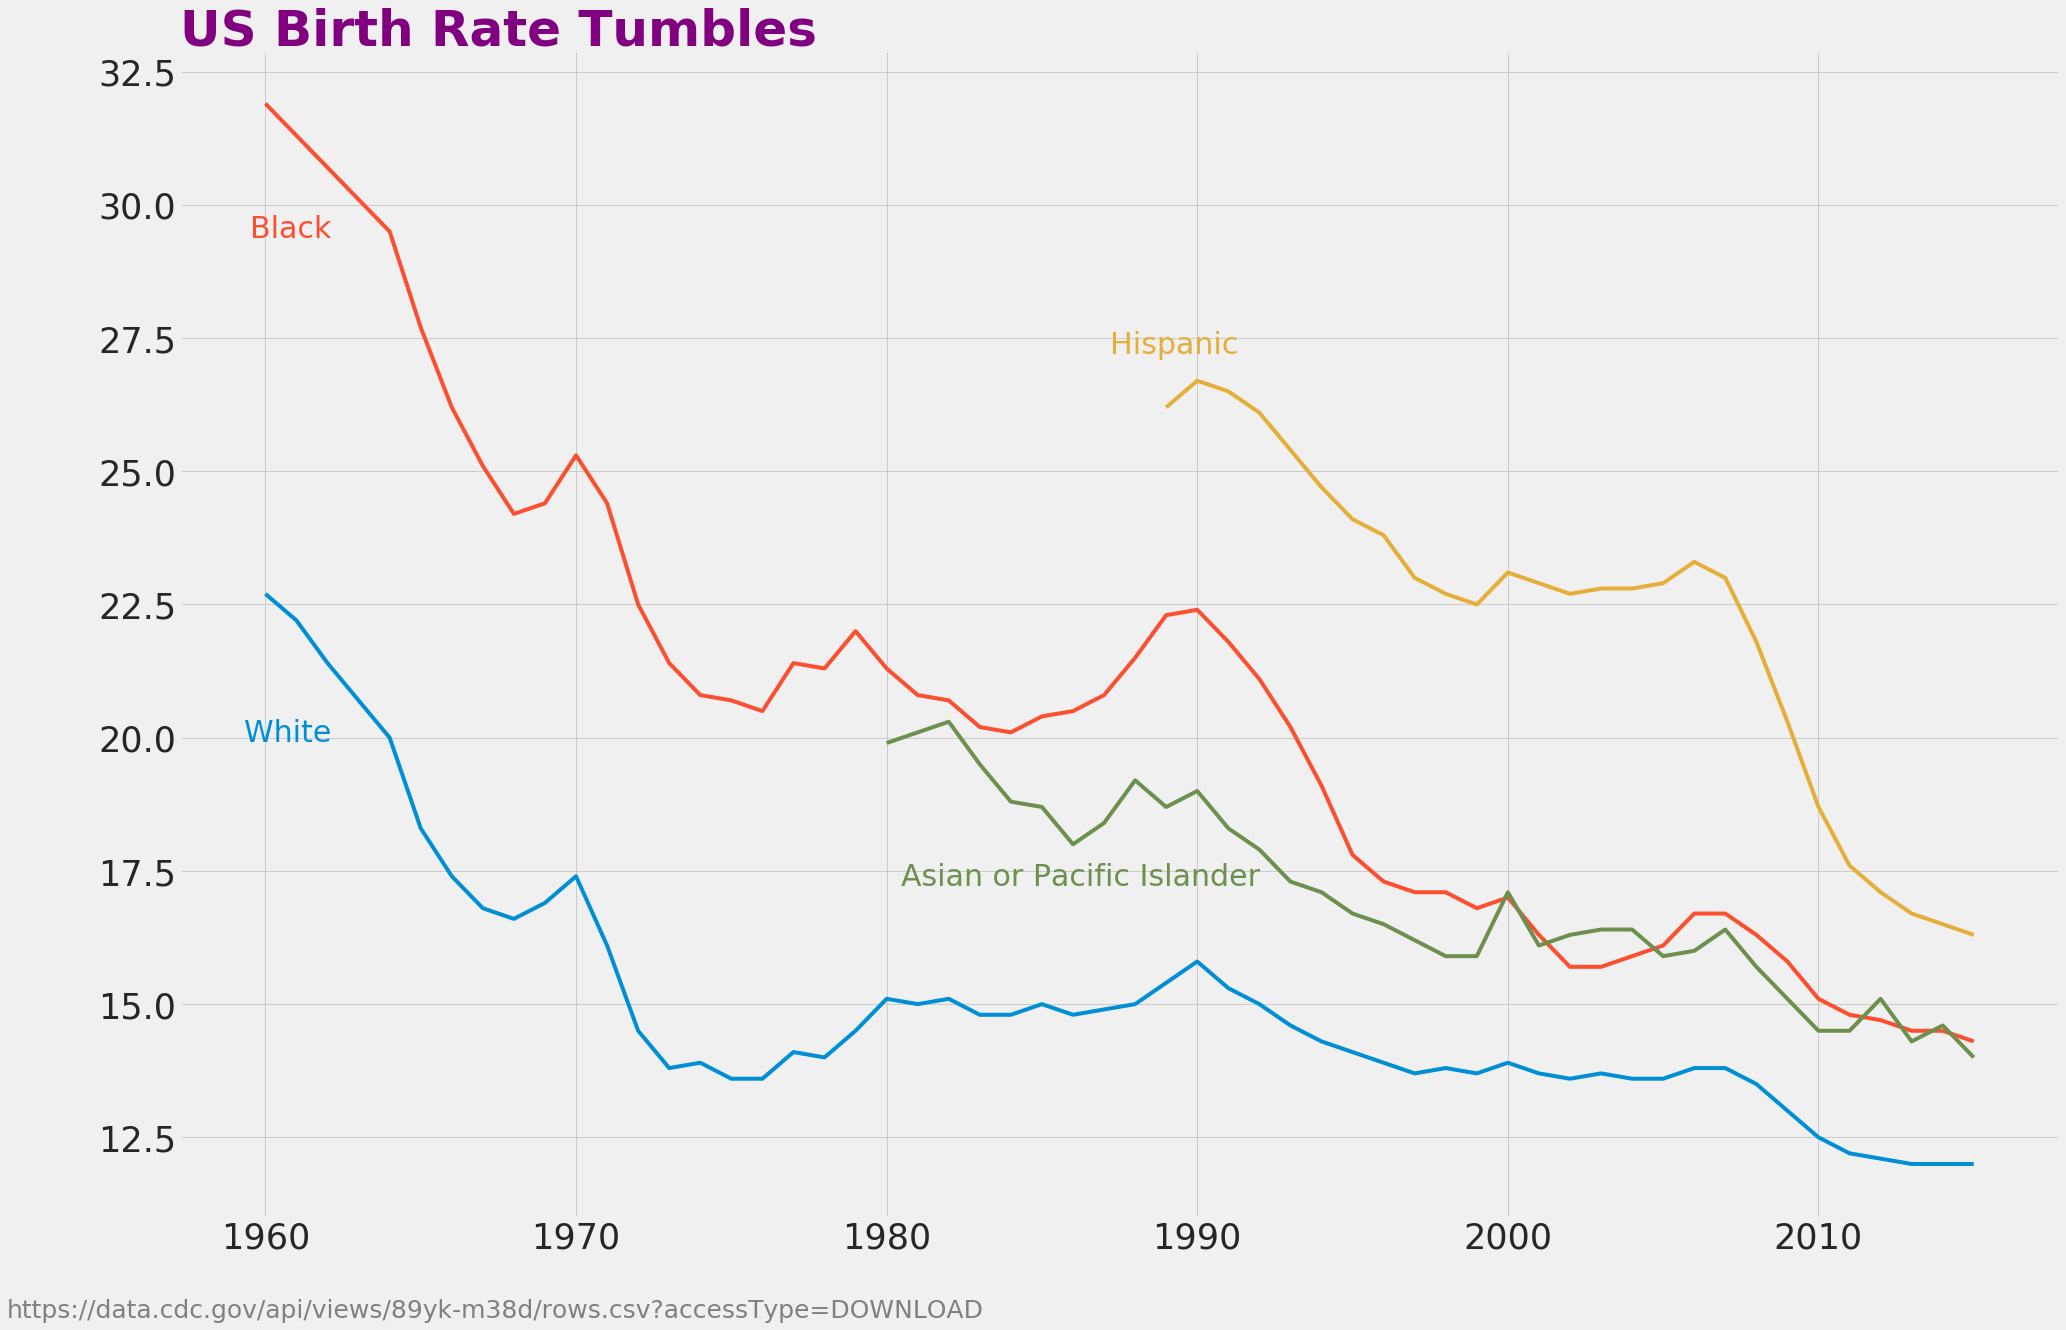

In [164]:
plt.rcParams['figure.figsize']=(30,20)
ax = sns.lineplot(x="Year", y="Birth Rate", hue="Race",data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], legend=False)
plt.figtext(.15,.40,'White',                     fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.figtext(.15,.75,'Black',                     fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.figtext(.57,.67,'Hispanic',                  fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
plt.figtext(.58,.30,'Asian or Pacific Islander', fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
plt.figtext(0,0,'https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD', fontsize=25, ha='left', color='grey')
plt.xlabel(''); plt.ylabel('')
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(35)
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(35)
plt.title('US Birth Rate Tumbles',loc='left', fontsize=50, fontweight='bold', color='Purple');

## Total fertility rate represents the number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year.

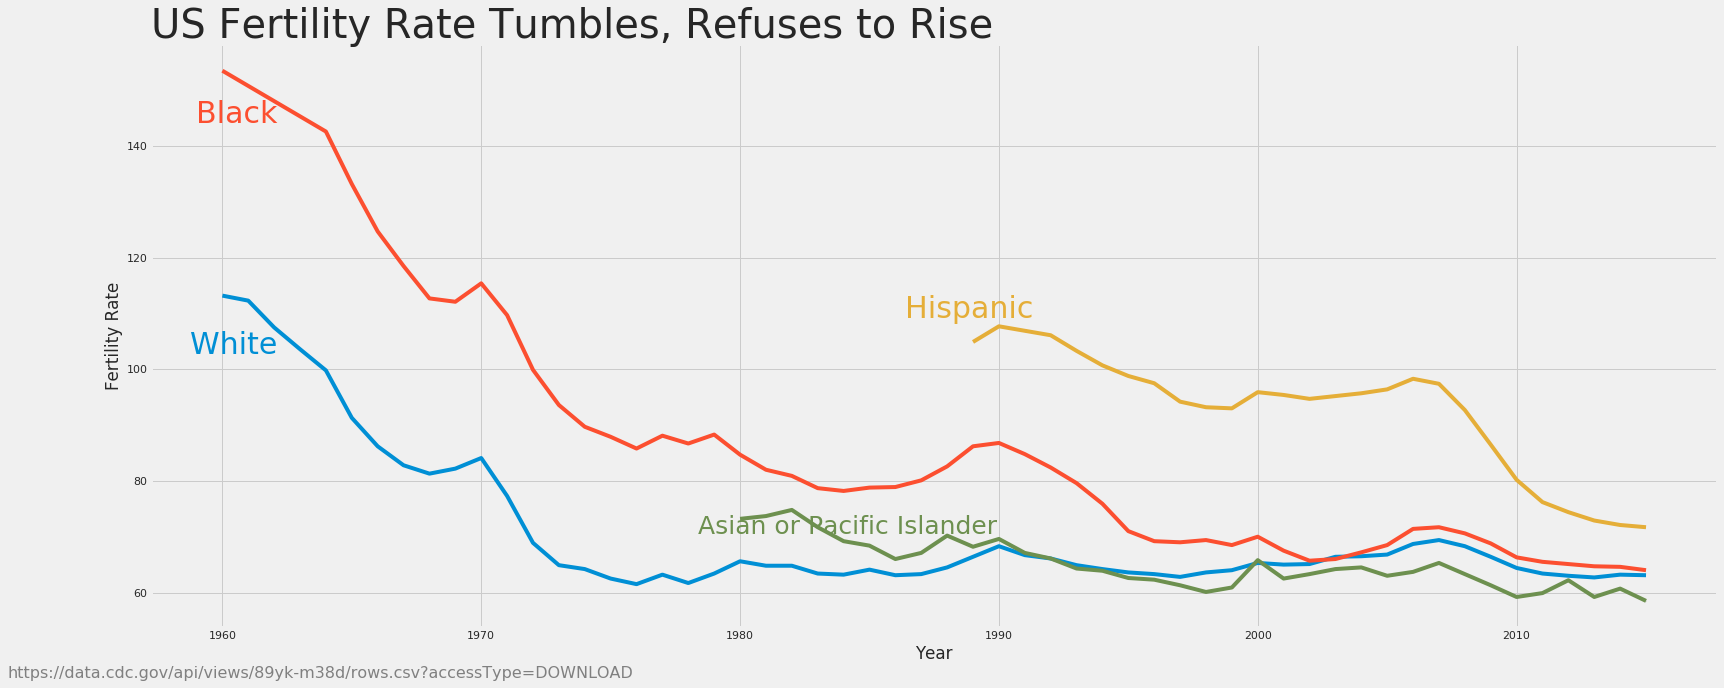

In [89]:
plt.rcParams['figure.figsize']=(25,10)
ax = sns.lineplot(x="Year", y="Fertility Rate", hue="Race",data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], legend=False)
plt.figtext(.15,.45,'White',                     fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.figtext(.15,.77,'Black',                     fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.figtext(.57,.50,'Hispanic',                  fontsize=30, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
plt.figtext(.55,.20,'Asian or Pacific Islander', fontsize=25, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
plt.figtext(0,0,'https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD', fontsize=16, ha='left', color='grey')
plt.title('US Fertility Rate Tumbles, Refuses to Rise', loc='left', fontsize=40);

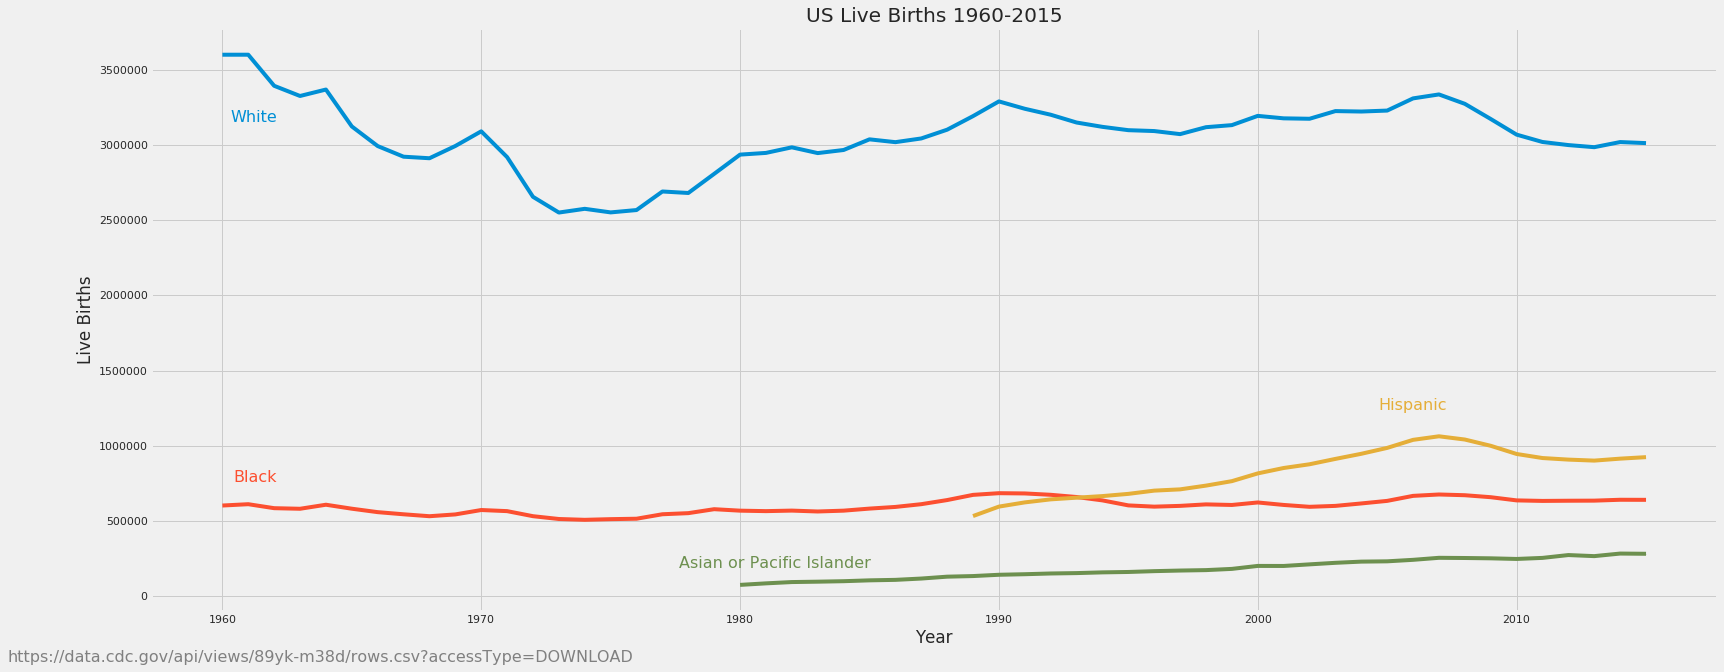

In [21]:
plt.rcParams['figure.figsize']=(25,10)
sns.lineplot(x="Year", y="Live Births", hue="Race", data=df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], legend=False)
plt.figtext(.15,.75,'White',                     fontsize=16, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.figtext(.15,.25,'Black',                     fontsize=16, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
plt.figtext(.80,.35,'Hispanic',                  fontsize=16, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
plt.figtext(.48,.13,'Asian or Pacific Islander', fontsize=16, ha='right', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
plt.figtext(0,0,'https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD', fontsize=16, ha='left', color='grey')
plt.title('US Live Births 1960-2015');
#plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7);

In [23]:
table = pd.pivot_table(df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], values='Fertility Rate', index=['Race'], columns=['Year'], aggfunc=np.mean)
table

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Race,,,,,,,,,,,,,,,,,,,,,
Asian or Pacific Islander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.7,65.3,63.3,61.3,59.2,59.9,62.2,59.2,60.7,58.5
Black,153.5,NaN,NaN,NaN,142.6,133.2,124.7,118.5,112.7,112.1,...,71.4,71.7,70.6,68.8,66.3,65.5,65.1,64.7,64.6,64.0
Hispanic Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.3,97.4,92.7,86.5,80.2,76.2,74.4,72.9,72.1,71.7
White,113.2,112.3,107.5,103.6,99.8,91.3,86.2,82.8,81.3,82.2,...,68.7,69.4,68.3,66.4,64.4,63.4,63.0,62.7,63.2,63.1


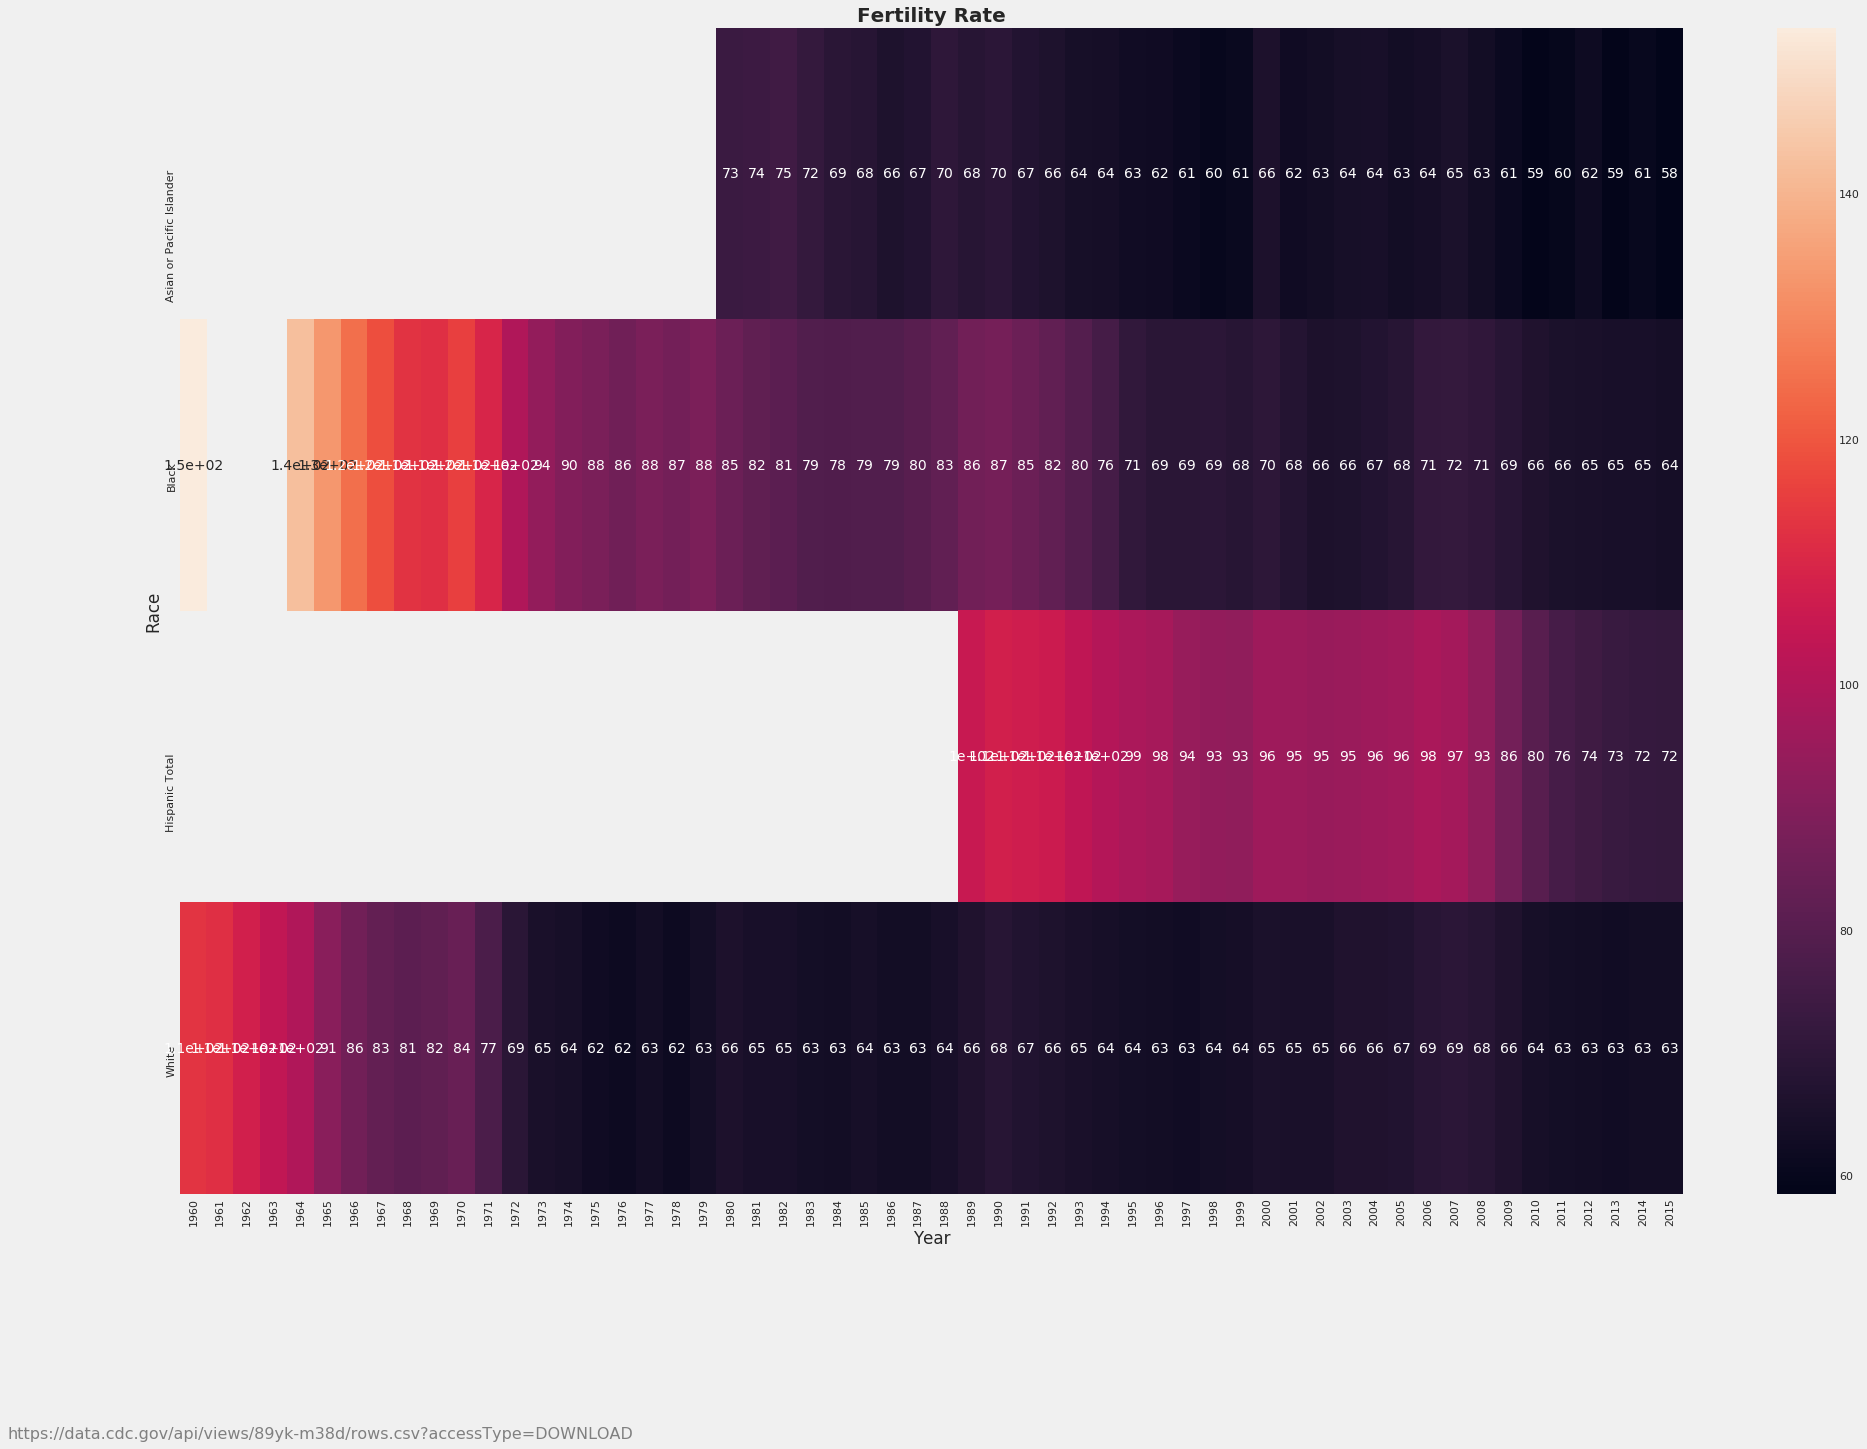

In [133]:
plt.rcParams['figure.figsize']=(30,20)
sns.heatmap(table, annot=True)
plt.figtext(0,-0.1,'https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD', fontsize=16, ha='left', color='grey')
plt.title('Fertility Rate', fontsize=20, fontweight='bold');

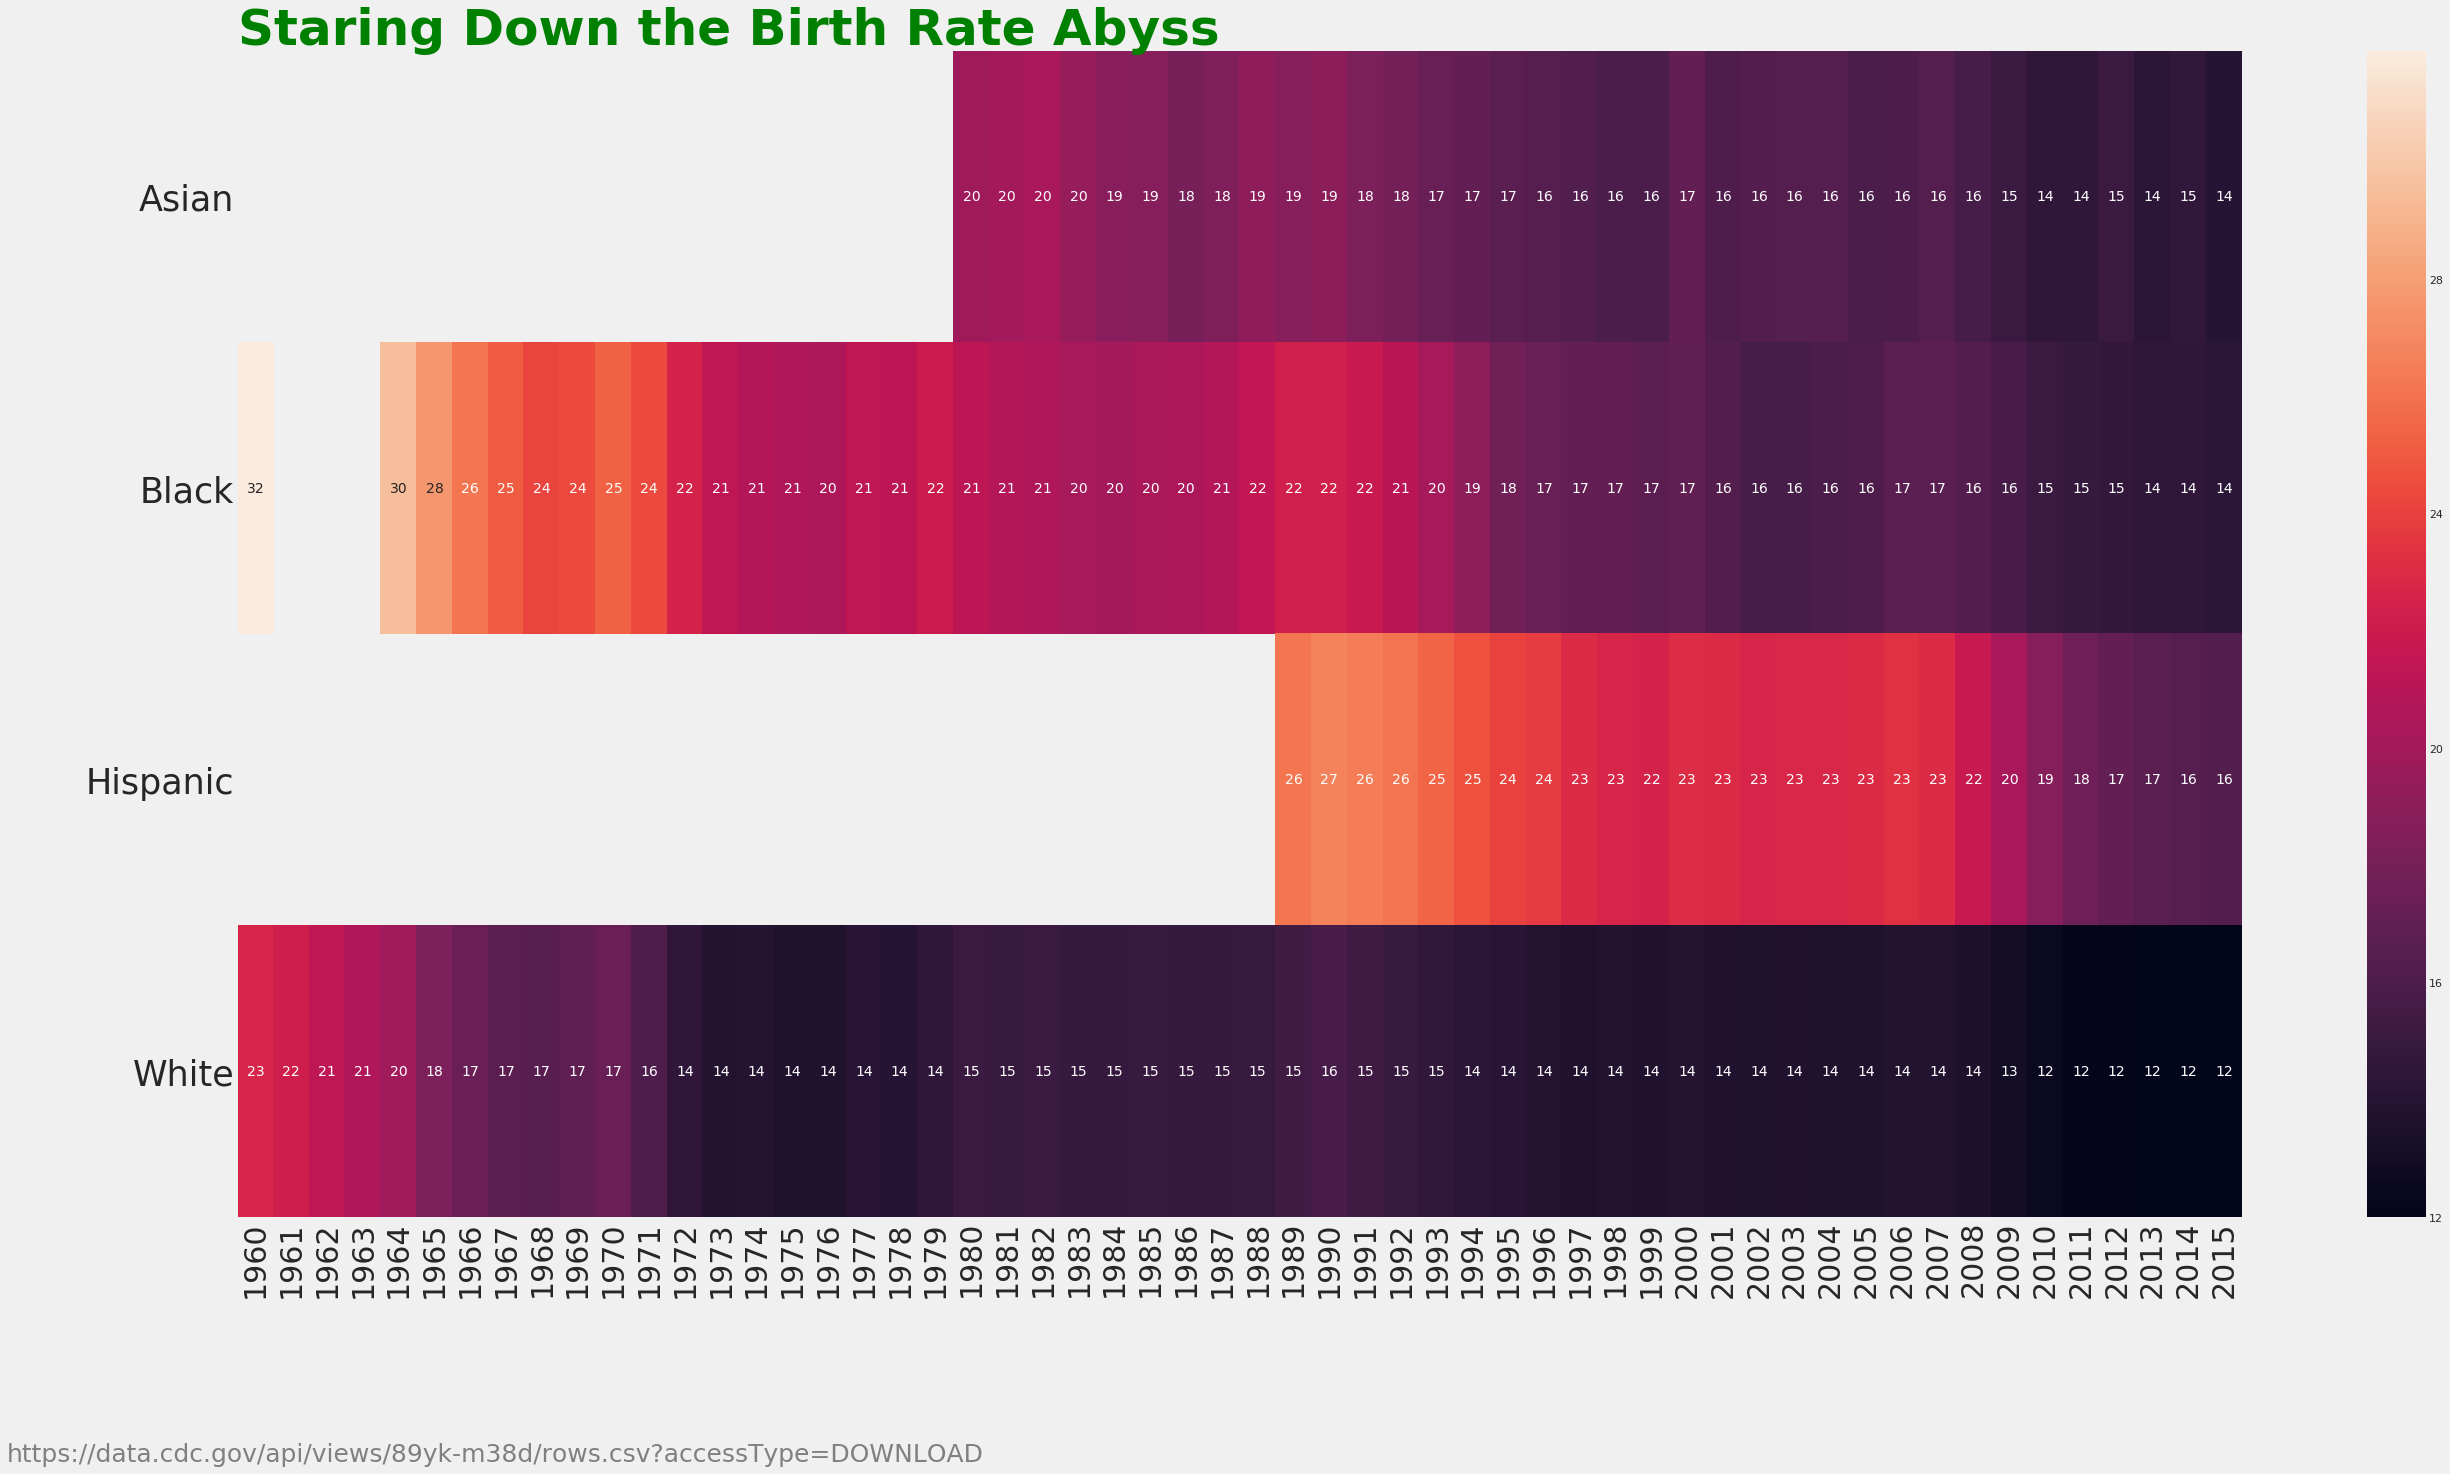

In [165]:
plt.rcParams['figure.figsize']=(40,20)
ax = sns.heatmap(pd.pivot_table(df[df['Race'].isin(['White','Black','Hispanic Total','Asian or Pacific Islander'])], values='Birth Rate', index=['Race'], columns=['Year'], aggfunc=np.mean), annot=True)
plt.figtext(0,-0.1,'https://data.cdc.gov/api/views/89yk-m38d/rows.csv?accessType=DOWNLOAD', fontsize=25, ha='left', color='grey')
plt.xlabel(''); plt.ylabel('')
plt.title('Staring Down the Birth Rate Abyss', loc='left', fontsize=50, color='Green', fontweight='bold')
for tick in ax.xaxis.get_major_ticks():
  tick.label.set_fontsize(30)
for tick in ax.yaxis.get_major_ticks():
  tick.label.set_fontsize(35)
ylabels = [item.get_text() for item in ax.get_yticklabels()]
ylabels[0] = 'Asian'; ylabels[2] = 'Hispanic'
xlabels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(xlabels, rotation=90)
ax.set_yticklabels(ylabels, rotation=0);

In [117]:
df.head(2)

,Year,Race,Live Births,Birth Rate,Fertility Rate
0,1960,White,3600744,22.7,113.2
1,1961,White,3600864,22.2,112.3
